In [28]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


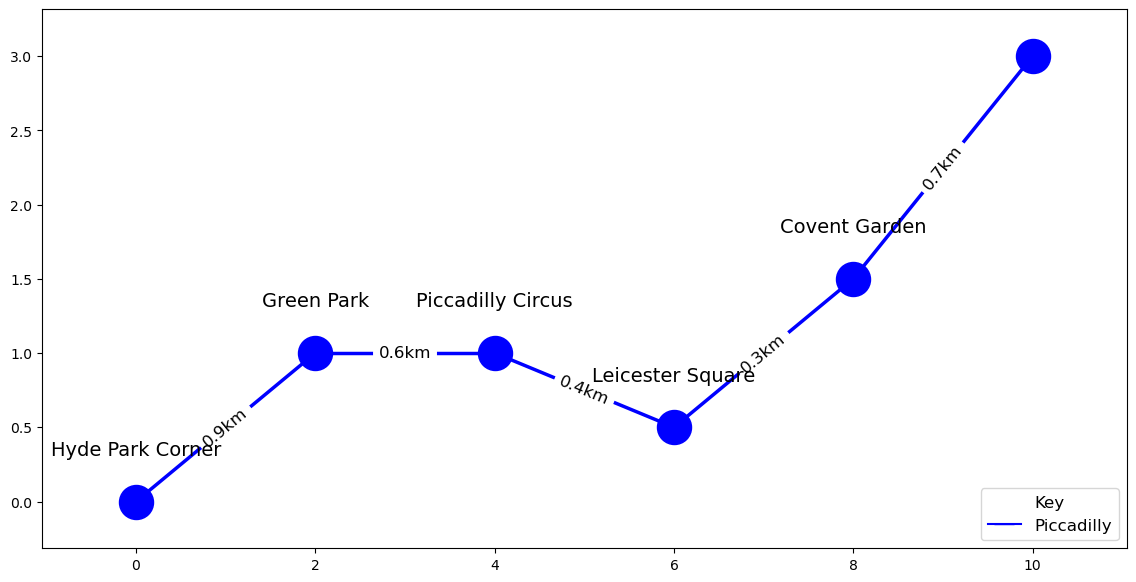

In [29]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G_task1 = nx.Graph()

stations_piccadilly = [
    "Hyde Park Corner", "Green Park", "Piccadilly Circus", 
    "Leicester Square", "Covent Garden", "Holborn"
]
pos_task1 = {
    "Hyde Park Corner": (0, 0),
    "Green Park": (2, 1),
    "Piccadilly Circus": (4, 1),
    "Leicester Square": (6, 0.5),
    "Covent Garden": (8, 1.5),
    "Holborn": (10, 3)
}

G_task1.add_nodes_from(stations_piccadilly)

edges_piccadilly = [
    ("Hyde Park Corner", "Green Park", 0.9),
    ("Green Park", "Piccadilly Circus", 0.6),
    ("Piccadilly Circus", "Leicester Square", 0.4),
    ("Leicester Square", "Covent Garden", 0.3),
    ("Covent Garden", "Holborn", 0.7)
]
G_task1.add_weighted_edges_from(edges_piccadilly)

plt.figure(figsize=(14, 7))

nx.draw_networkx_nodes(G_task1, pos_task1, node_color='blue', node_size=600)
nx.draw_networkx_edges(G_task1, pos_task1, width=2.5, edge_color='blue')

label_pos = {k: (v[0], v[1] + 0.35) for k, v in pos_task1.items()}
nx.draw_networkx_labels(G_task1, label_pos, font_size=14, font_family='sans-serif')

edge_labels_task1 = nx.get_edge_attributes(G_task1, 'weight')
formatted_edge_labels = {edge: f"{weight:.1f}km" for edge, weight in edge_labels_task1.items()}
nx.draw_networkx_edge_labels(G_task1, pos_task1, edge_labels=formatted_edge_labels, font_size=12)

blue_line = plt.Line2D([], [], color='blue', marker='_', markersize=15, label='Piccadilly')

plt.legend(handles=[blue_line], title='Key', loc='lower right', fontsize='large', title_fontsize='large')

plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True)
plt.tick_params(axis='y', which='both', right=False, left=True, labelleft=True)
plt.box(on=True)
plt.show()

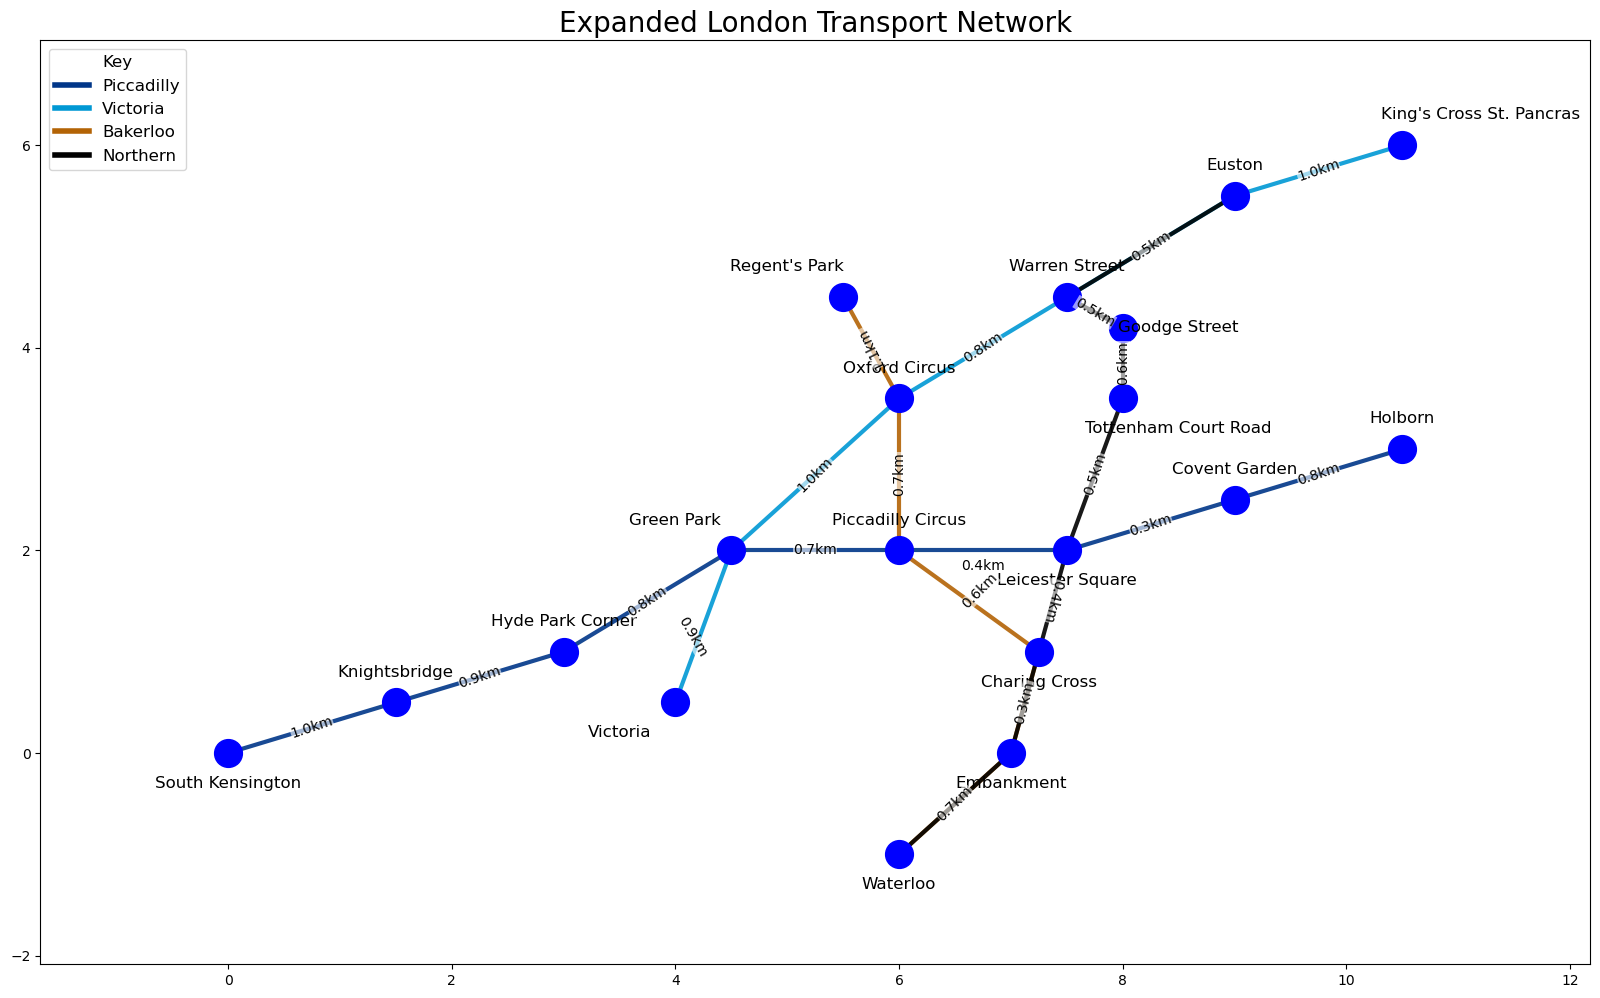

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G_task2 = nx.Graph()
tube_lines = {
    "Piccadilly": {"stations": ["South Kensington", "Knightsbridge", "Hyde Park Corner", "Green Park", "Piccadilly Circus", "Leicester Square", "Covent Garden", "Holborn"], "color": "#003688"},
    "Victoria": {"stations": ["Victoria", "Green Park", "Oxford Circus", "Warren Street", "Euston", "King's Cross St. Pancras"], "color": "#0098D4"},
    "Bakerloo": {"stations": ["Waterloo", "Embankment", "Charing Cross", "Piccadilly Circus", "Oxford Circus", "Regent's Park"], "color": "#B36305"},
    "Northern": {"stations": ["Waterloo", "Embankment", "Charing Cross", "Leicester Square", "Tottenham Court Road", "Goodge Street", "Warren Street", "Euston"], "color": "#000000"}
}
pos_task2 = {
    "South Kensington": (0, 0), "Knightsbridge": (1.5, 0.5), "Hyde Park Corner": (3, 1),
    "Green Park": (4.5, 2), "Piccadilly Circus": (6, 2), "Leicester Square": (7.5, 2),
    "Covent Garden": (9, 2.5), "Holborn": (10.5, 3), "Victoria": (4, 0.5),
    "Oxford Circus": (6, 3.5), "Warren Street": (7.5, 4.5), "Euston": (9, 5.5),
    "King's Cross St. Pancras": (10.5, 6), "Waterloo": (6, -1), "Embankment": (7, 0),
    "Charing Cross": (7.25, 1), "Regent's Park": (5.5, 4.5),
    "Tottenham Court Road": (8, 3.5), "Goodge Street": (8, 4.2)
}

real_distances = {
    ("South Kensington", "Knightsbridge"): 1.0, ("Knightsbridge", "Hyde Park Corner"): 0.9,
    ("Hyde Park Corner", "Green Park"): 0.8, ("Green Park", "Piccadilly Circus"): 0.7,
    ("Piccadilly Circus", "Leicester Square"): 0.4, ("Leicester Square", "Covent Garden"): 0.3,
    ("Covent Garden", "Holborn"): 0.8, ("Victoria", "Green Park"): 0.9,
    ("Green Park", "Oxford Circus"): 1.0, ("Oxford Circus", "Warren Street"): 0.8,
    ("Warren Street", "Euston"): 0.5, ("Euston", "King's Cross St. Pancras"): 1.0,
    ("Waterloo", "Embankment"): 0.7, ("Embankment", "Charing Cross"): 0.3,
    ("Charing Cross", "Piccadilly Circus"): 0.6, ("Piccadilly Circus", "Oxford Circus"): 0.7,
    ("Oxford Circus", "Regent's Park"): 1.1, ("Charing Cross", "Leicester Square"): 0.4,
    ("Leicester Square", "Tottenham Court Road"): 0.5, ("Tottenham Court Road", "Goodge Street"): 0.6,
    ("Goodge Street", "Warren Street"): 0.5
}

for line in tube_lines.values():
    G_task2.add_nodes_from(line["stations"])

for (u, v), dist in real_distances.items():
    G_task2.add_edge(u, v, weight=dist)

fig, ax = plt.subplots(figsize=(20, 12))
nx.draw_networkx_nodes(G_task2, pos_task2, node_color='blue', node_size=400, ax=ax)

for line, data in tube_lines.items():
    edges = list(zip(data["stations"][:-1], data["stations"][1:]))
    nx.draw_networkx_edges(G_task2, pos_task2, edgelist=edges, width=3, edge_color=data["color"], alpha=0.9, ax=ax)

node_label_pos = {
    'South Kensington': (0, -0.3), 'Knightsbridge': (1.5, 0.8), 'Hyde Park Corner': (3, 1.3),
    'Green Park': (4.0, 2.3), 'Victoria': (3.5, 0.2), 'Piccadilly Circus': (6, 2.3),
    'Oxford Circus': (6, 3.8), 'Regent\'s Park': (5.0, 4.8), 'Warren Street': (7.5, 4.8),
    'Goodge Street': (8.5, 4.2), 'Tottenham Court Road': (8.5, 3.2), 'Leicester Square': (7.5, 1.7),
    'Charing Cross': (7.25, 0.7), 'Embankment': (7, -0.3), 'Waterloo': (6, -1.3),
    'Covent Garden': (9, 2.8), 'Holborn': (10.5, 3.3), 'Euston': (9, 5.8),
    'King\'s Cross St. Pancras': (11.2, 6.3)
}
nx.draw_networkx_labels(G_task2, node_label_pos, font_size=12, font_family='sans-serif', ax=ax)

edge_label_manual_offsets = {
    ('Piccadilly Circus', 'Leicester Square'): (0, -0.15, 0),
    ('Charing Cross', 'Piccadilly Circus'): (0.1, 0.1, 45),
    ('Green Park', 'Victoria'): (-0.1, -0.1, -60)
}

for u, v, data in G_task2.edges(data=True):
    pos_u, pos_v = pos_task2[u], pos_task2[v]
    mid_point = np.array([(pos_u[0] + pos_v[0]) / 2, (pos_u[1] + pos_v[1]) / 2])
    
    dx = pos_v[0] - pos_u[0]
    dy = pos_v[1] - pos_u[1]
    angle = np.degrees(np.arctan2(dy, dx))
    
    text = f"{data['weight']:.1f}km"
    
    final_pos = mid_point
    final_angle = angle
    if (u,v) in edge_label_manual_offsets:
        offset = edge_label_manual_offsets[(u,v)]
        final_pos = mid_point + np.array([offset[0], offset[1]])
        final_angle = offset[2]
    elif (v,u) in edge_label_manual_offsets:
        offset = edge_label_manual_offsets[(v,u)]
        final_pos = mid_point + np.array([offset[0], offset[1]])
        final_angle = offset[2]

    ax.text(final_pos[0], final_pos[1], text,
            ha='center', va='center', rotation=final_angle,
            fontsize=10,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.6, pad=0.1))

ax.set_title("Expanded London Transport Network", fontsize=20)
legend_handles = [plt.Line2D([0], [0], color=data["color"], lw=4, label=line) for line, data in tube_lines.items()]
ax.legend(handles=legend_handles, title='Key', loc='best', fontsize='large', title_fontsize='large')
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
ax.margins(0.1)
plt.show()

In [2]:

import numpy as np
all_distances = list(nx.get_edge_attributes(G_task2, 'weight').values())

total_length = sum(all_distances)

average_distance = np.mean(all_distances)

std_deviation = np.std(all_distances)

print("--- Network Analysis Results ---")
print(f"Total Network Length: {total_length:.2f} km")
print(f"Average Distance Between Stations: {average_distance:.2f} km")
print(f"Standard Deviation of Distances: {std_deviation:.2f} km")
print("--------------------------------")

--- Network Analysis Results ---
Total Network Length: 14.50 km
Average Distance Between Stations: 0.69 km
Standard Deviation of Distances: 0.24 km
--------------------------------
